## Time Series Challenge

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

**U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL), retrieved from FRED, Federal Reserve Bank of St. Louis; Referece:[website](https://fred.stlouisfed.org/series/CPIAUCSL), March 24, 2020.**

The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a measure of the average monthly change in the price for goods and services paid by urban consumers between any two time periods. It can also represent the buying habits of urban consumers. This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, self-employed, short-term workers, unemployed, retirees, and those not in the labor force. 

The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from about 4,000 housing units and approximately 26,000 retail establishments across 87 urban areas.

### Time Series Challenge Steps

* Plot the time series, along with any logical or necessary differences to get a stationary dataset
* Generate and interpret a PACF for the time series (and/or its differences)
* Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
* Finally choose one specification and make the case for that as a logical model for your dataset.

In [2]:
cpi_data = pd.read_csv('CPIAUCSL.csv')

# Remove NA's
cpi_data.dropna(inplace=True)

In [3]:
cpi_data.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


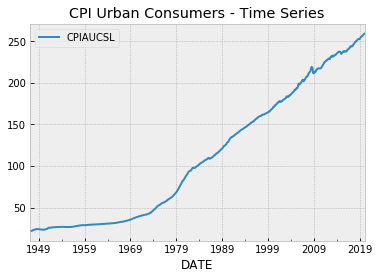

In [4]:
plt.style.use('bmh')
cpi_data.index = pd.to_datetime(cpi_data.DATE)
cpi_data.plot()
plt.title('CPI Urban Consumers - Time Series')
plt.show()

We can see that the consumer price index has been rising steadily through the years. 

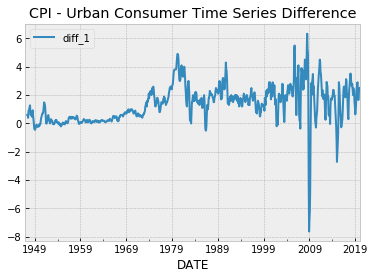

In [5]:
#Let's plot the difference
cpi_data['diff_1'] = cpi_data['CPIAUCSL'] - cpi_data['CPIAUCSL'].shift(periods=5)
cpi_data.plot(y='diff_1')
plt.title('CPI - Urban Consumer Time Series Difference')
plt.show()

Let's have a look at the difference with five periods to have an in depth insight. We do see a pattern, however it is not consistent.

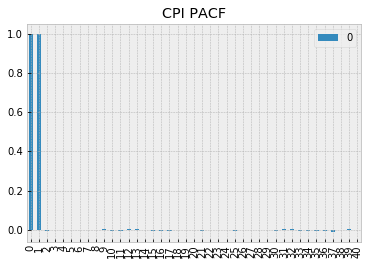

In [6]:
# Plotting the PACF (Partial Auto-Correlation Function)
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(cpi_data['CPIAUCSL']))
x_acf.plot(kind='bar')
plt.title("CPI PACF")
plt.show()

The PACF shows one correlation.
Now let's check the PACF for the difference.

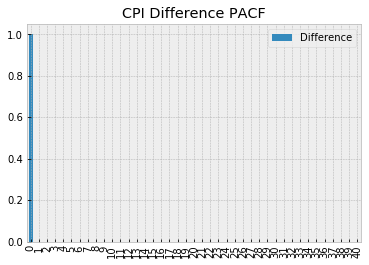

In [7]:
x_acf = pd.DataFrame(pacf(cpi_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("CPI Difference PACF")
plt.legend(['Difference'])
plt.show()

So our initial model has one strong correlation and the difference has none. Let's build some ARIMA models to validate!

* The parameteres are passed in (p, d, q) order, corresponding to the AR, I, and MA portions respectively.

* The AR is the past values, I is the level of differencing, and MA is adjusting to past errors.

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  877
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -408.759
Method:                           css   S.D. of innovations              0.386
Date:                Tue, 24 Mar 2020   AIC                            821.518
Time:                        16:56:32   BIC                            831.071
Sample:                    02-01-1947   HQIC                           825.172
                         - 02-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2709      0.013     20.802      0.000       0.245       0.296
Residuals Description
count    8.770000e+02
mean     1.768286e-12
std      3.858601e-01
min     -4.112889e+00
25%     -2.108894e-01

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'0,1,0 Histogram of Residuals')

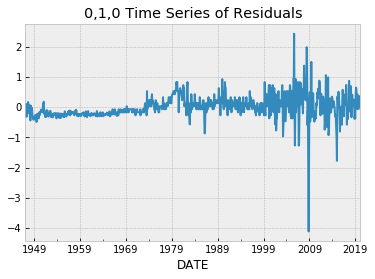

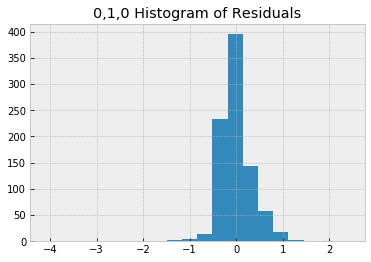

In [8]:
from statsmodels.tsa.arima_model import ARIMA
model_010 = ARIMA(cpi_data['CPIAUCSL'], order=(0,1,0))
model_010_fit = model_010.fit()
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

residuals_010 = pd.DataFrame(model_010_fit.resid)

residuals_010.plot(legend=False)
plt.title('0,1,0 Time Series of Residuals')

residuals_010.hist(bins=20)
plt.title('0,1,0 Histogram of Residuals')

                              ARMA Model Results                              
Dep. Variable:               CPIAUCSL   No. Observations:                  878
Model:                     ARMA(1, 0)   Log Likelihood                -594.202
Method:                       css-mle   S.D. of innovations              0.471
Date:                Tue, 24 Mar 2020   AIC                           1194.404
Time:                        16:56:33   BIC                           1208.737
Sample:                    01-01-1947   HQIC                          1199.886
                         - 02-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.0775        nan        nan        nan         nan         nan
ar.L1.CPIAUCSL     1.0000        nan        nan        nan         nan         nan
                                    

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5,1,'1,0,0 Histogram of Residuals')

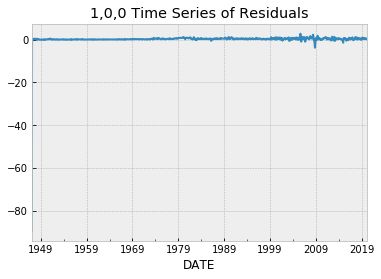

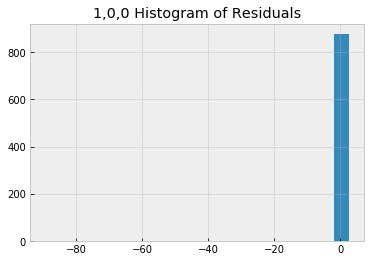

In [9]:
model_100 = ARIMA(cpi_data['CPIAUCSL'], order=(1,0,0))
model_100_fit = model_100.fit()
print(model_100_fit.summary())
print('Residuals Description')
print(model_100_fit.resid.describe())

residuals_100 = pd.DataFrame(model_100_fit.resid)

residuals_100.plot(legend=False)
plt.title('1,0,0 Time Series of Residuals')

residuals_100.hist(bins=20)
plt.title('1,0,0 Histogram of Residuals')

                              ARMA Model Results                              
Dep. Variable:               CPIAUCSL   No. Observations:                  878
Model:                     ARMA(0, 1)   Log Likelihood               -4466.293
Method:                       css-mle   S.D. of innovations             39.021
Date:                Tue, 24 Mar 2020   AIC                           8938.586
Time:                        16:56:33   BIC                           8952.919
Sample:                    01-01-1947   HQIC                          8944.068
                         - 02-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            110.4785      2.632     41.971      0.000     105.319     115.638
ma.L1.CPIAUCSL     1.0000      0.003    353.202      0.000       0.994       1.006
                                    

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'0,0,1 Histogram of Residuals')

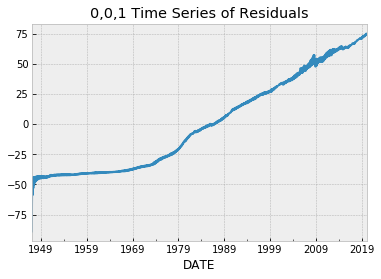

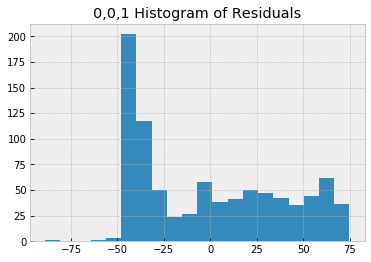

In [10]:
model_001 = ARIMA(cpi_data['CPIAUCSL'], order=(0,0,1))
model_001_fit = model_001.fit()
print(model_001_fit.summary())
print('Residuals Description')
print(model_001_fit.resid.describe())

residuals_001 = pd.DataFrame(model_001_fit.resid)

residuals_001.plot(legend=False)
plt.title('0,0,1 Time Series of Residuals')

residuals_001.hist(bins=20)
plt.title('0,0,1 Histogram of Residuals')

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  877
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -261.161
Method:                       css-mle   S.D. of innovations              0.326
Date:                Tue, 24 Mar 2020   AIC                            530.323
Time:                        16:56:33   BIC                            549.429
Sample:                    02-01-1947   HQIC                           537.631
                         - 02-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2707      0.021     12.692      0.000       0.229       0.312
ar.L1.D.CPIAUCSL     0.3768      0.058      6.486      0.000       0.263       0.491
ma.L1.D.CPIAUCSL     0.2088 

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'Histogram of Residuals')

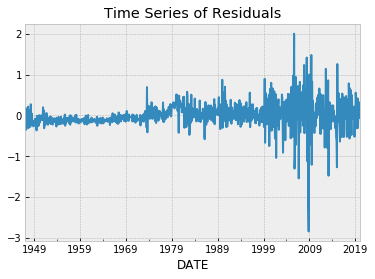

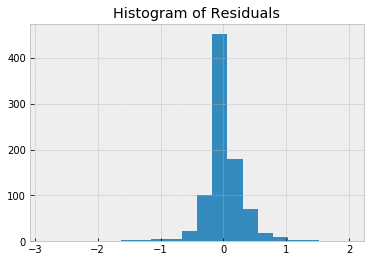

In [11]:
model_111 = ARIMA(cpi_data['CPIAUCSL'], order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

residuals_111 = pd.DataFrame(model_111_fit.resid)

residuals_111.plot(legend=False)
plt.title('Time Series of Residuals')

residuals_111.hist(bins=20)
plt.title('Histogram of Residuals')

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  877
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -229.768
Method:                       css-mle   S.D. of innovations              0.314
Date:                Tue, 24 Mar 2020   AIC                            483.536
Time:                        16:56:36   BIC                            540.854
Sample:                    02-01-1947   HQIC                           505.459
                         - 02-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2650      0.084      3.171      0.002       0.101       0.429
ar.L1.D.CPIAUCSL     1.1381      0.215      5.285      0.000       0.716       1.560
ar.L2.D.CPIAUCSL    -1.1240 

Text(0.5,1,'5,1,5 Histogram of Residuals')

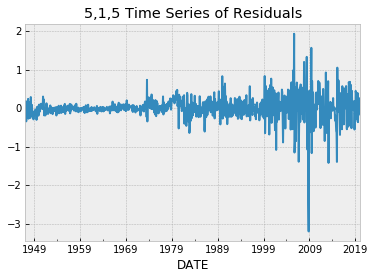

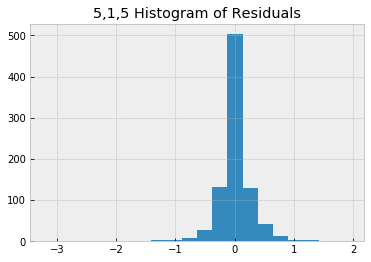

In [12]:
model_515 = ARIMA(cpi_data['CPIAUCSL'], order=(5,1,5))
model_515_fit = model_515.fit()
print(model_515_fit.summary())
print('Residuals Description')
print(model_515_fit.resid.describe())

residuals_515 = pd.DataFrame(model_515_fit.resid)

residuals_515.plot(legend=False)
plt.title('5,1,5 Time Series of Residuals')

residuals_515.hist(bins=20)
plt.title('5,1,5 Histogram of Residuals')

### AIC Summary:

Except (0,0,1) and (1,0,0), that is models: (5,1,5), (1,1,1) and (0,1,0) are normally distributed.
    
* AIC SUMMARY:

    (0,1,0) = 821
    
    (1,1,1) = 530
    
    (5,1,5) = 483
    
**The least AIC model is chosen to be the best. Here, we have the model (5,1,5) as the model with least AIC.**

$$ exp((AIC_{min} - AIC_{x})/2) $$

In [13]:
# Use some Python to do the calculations here
#Let's compare our models to ARIMA (5,1,5) model
import math
arima_010 = 821
arima_111 = 530
arima_515 = 483

exponent1 = (arima_515 - arima_010)/2
difference1 = math.exp(exponent1)

exponent2 = (arima_515 - arima_111)/2
difference2 = math.exp(exponent2)

print(difference1)
print(difference2)

4.020060215743355e-74
6.224144622907783e-11


**we get a probability of 4.020e-74 and 6.224e-11 that we lost less information in our AR(5,1,5) model.**

#### ARIMA (5,1,5) is the best compared to the rest!